<a href="https://colab.research.google.com/github/rajibmondal/Projects.NLP/blob/master/NLP_with_Disaster_Tweets2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import fastai
fastai.__version__


'1.0.60'

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.text import *
bs=128

In [80]:
from google.colab import drive
drive.mount('/content/drive')
root_dir = '/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/'
base_dir = root_dir #+ 'Disaster_NLP'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
base_dir = Path(base_dir)

In [82]:
# check if the dirctory exists if not make it
import os
if not (os.path.exists(base_dir)):
  base_dir.mkdir(parents=True, exist_ok=True)
base_dir

PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets')

In [83]:
path = Path('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets')
path.ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/NLP with Disaster Tweets.ipynb'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/data_lm.pkl'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/fit_head.pkl')]

In [84]:
df_full = pd.read_csv(path/'train.csv')
df_full.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [85]:
df = pd.read_csv(path/'clean_train.csv')
df.head()


,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [86]:
data_clas = (TextList
           .from_csv(path, 'train.csv', cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct(0.1)
           #How to split it? Randomly with the default 20% in valid
           .label_from_df(cols='target')
           #Label it for a language model
           .databunch(bs=bs))
           #Finally we convert to a DataBunch


# # data_lm = (TextList.from_folder(path).filter_by_folder(include=['train','test'])
# # .split_by_rand_pct(0.1, seed=42).label_for_lm().databunch(bs=bs, num_workers=1))

# data_clas = (TextList
#            .from_csv(path, 'clean_train.csv', cols='text')
#            #Where are the text? Column 'text' of texts.csv
#            .split_by_rand_pct()
#            #How to split it? Randomly with the default 20% in valid
#            .label_from_df(cols='target')
#            #Label it for a language model
#            .databunch(bs=bs))
#            #Finally we convert to a DataBunch

# data_clas.show_batch()






In [87]:
data_clas.show_batch()

text,target
xxbos _ \n xxrep 5 ? xxup retweet \n xxrep 7 ? \n xxrep 5 ? xxup follow xxup all xxup who xxup rt \n xxrep 7 ? \n xxrep 5 ? xxup xxunk \n xxrep 7 ? \n xxrep 5 ? xxup xxunk xxup with \n xxrep 7 ? \n xxrep 5 ? xxup follow ? xxunk # xxup xxunk,0
xxbos . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : xxup rt xxunk : # xxunk \n \n xxmaj indian xxmaj army xxunk _ http : / / t.co / xxunk g,0
xxbos xxup info xxup s. xxup wnd : xxunk / 6 . xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 .,0
xxbos xxup info xxup u. xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 . xxup wnd : xxunk / 6 .,0
xxbos xxup info xxup r. xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup wnd : xxunk / 5 . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup xxunk . xxup tmp : 10 . xxup xxunk : xxunk .,0


In [89]:
data_clas.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '/']

In [90]:
[(v, i) for i, v in enumerate(data_clas.vocab.stoi)][:100]

[('xxunk', 0),
 ('xxpad', 1),
 ('xxbos', 2),
 ('xxeos', 3),
 ('xxfld', 4),
 ('xxmaj', 5),
 ('xxup', 6),
 ('xxrep', 7),
 ('xxwrep', 8),
 ('/', 9),
 (':', 10),
 ('t.co', 11),
 ('http', 12),
 ('#', 13),
 ('the', 14),
 ('.', 15),
 ('a', 16),
 ('in', 17),
 ('to', 18),
 ('of', 19),
 ('i', 20),
 ('?', 21),
 ('and', 22),
 ('-', 23),
 ("'", 24),
 ('!', 25),
 ('is', 26),
 ('...', 27),
 ('you', 28),
 ('for', 29),
 ('on', 30),
 ("'s", 31),
 ('it', 32),
 ('my', 33),
 ('&', 34),
 ('that', 35),
 ('\n ', 36),
 ('with', 37),
 ('at', 38),
 ('by', 39),
 ('this', 40),
 ("n't", 41),
 ('from', 42),
 ('_', 43),
 ('https', 44),
 ('are', 45),
 ('be', 46),
 ('was', 47),
 ('have', 48),
 ('do', 49),
 ('like', 50),
 ('up', 51),
 ('as', 52),
 ('4', 53),
 ('but', 54),
 ('so', 55),
 ('me', 56),
 ('(', 57),
 (')', 58),
 ('just', 59),
 ('not', 60),
 ('we', 61),
 ('out', 62),
 ('your', 63),
 ('all', 64),
 ('will', 65),
 ('no', 66),
 ('has', 67),
 ('after', 68),
 ('fire', 69),
 ('an', 70),
 ('he', 71),
 ('when', 72),
 ('

In [91]:
data_clas.train_ds[100]

(Text xxbos xxmaj aftershock was the most terrifying best roller xxunk i 've ever been on . * xxup xxunk * i 've been on very few .,
 Category 0)

In [92]:
data_clas.train_ds[100][0].data[:100]

array([   2,    5, 1090,   47,   14,  265, 3304,  202, 3305,    0,   20,  222,  247,   84,   30,   15,   95,    6,
          0,   95,   20,  222,   84,   30,  539,  728,   15])

In [93]:
%time
data_lm = (TextList
           .from_csv(path, 'train.csv', cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct(0.1)
           #How to split it? Randomly with the default 20% in valid
           .label_for_lm()#from_df(cols='target')
           #Label it for a language model
           .databunch(bs=bs))
           #Finally we convert to a DataBunch

# data_lm = (TextList.from_csv(path,'clean_train.csv')
#            #Inputs: all the text files in path
#             .filter_by_csv(include=['clean_train.csv']) 
#            #We may have other temp folders that contain text files so we only keep what's in train and test
#             .split_by_rand_pct(0.1)
#            #We randomly split and keep 10% (10,000 reviews) for validation
#             .label_for_lm()           
#            #We want to do a language model so we label accordingly
#             .databunch(bs=bs))
# data_lm.save('data1_lm.pkl')

# %time
# data = (TextList
#            .from_csv(path, 'clean_train.csv', cols='text')
#            #Where are the text? Column 'text' of texts.csv
#            .split_by_rand_pct(0.1)
#            #How to split it? Randomly with the default 20% in valid
#            .label_for_lm()#from_df(cols='target')
#            #Label it for a language model
#            .databunch(bs=bs))
#            #Finally we convert to a DataBunch








CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs


In [94]:
data_lm.show_batch()

idx,text
0,orders in xxmaj california xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school xxbos # rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # xxunk # wildfires xxbos # flood # disaster xxmaj heavy rain causes flash flooding of streets in xxmaj
1,xxunk xxmaj rd near xxmaj xxunk involving an xxunk vehicle . xxmaj please use ... http : / / t.co / xxunk xxbos xxunk xxmaj live xxmaj accident xxmaj xxunk xxbos xxup rt xxunk : xxmaj sleeping xxunk double your risk of a car accident http : / / t.co / xxunk xxbos ' xxmaj by accident ' they knew what was gon happen https : / / t.co /
2,my life will never be the same xxbos xxunk i love you xxunk xxbos xxmaj aftershock https : / / t.co / xxunk xxbos xxmaj people who say it can not be done should not xxunk those who are doing it . xxup ûò xxmaj george xxmaj xxunk xxmaj xxunk xxbos ' xxmaj the first man gets the xxunk the second man gets the shell . ' xxmaj xxunk xxmaj
3,17 per hour xxunk xxunk http : / / t.co / xxunk # ems # xxunk # ambulance xxbos http : / / t.co / xxunk xxmaj twelve feared killed in xxmaj pakistani air ambulance helicopter crash http : / / t.co / xxunk xxbos xxmaj twelve feared killed in xxmaj pakistani air ambulance helicopter crash http : / / t.co / xxunk t xxbos xxup ambulance xxup sprinter xxup
4,via @change xxbos xxunk can you please sign and share this petition to save wild horses in xxmaj arizona . http : / / t.co / xxunk xxrep 4 ? xxbos xxup u.s xxmaj national xxmaj park xxmaj services xxmaj tonto xxmaj national xxmaj forest : xxmaj stop the xxmaj annihilation of the xxmaj salt xxmaj river xxmaj wild xxmaj horse ... http : / / t.co / xxunk m


In [95]:
%%time
data_lm.save(base_dir/'data_lm.pkl')

CPU times: user 112 ms, sys: 13.4 ms, total: 126 ms
Wall time: 136 ms


In [0]:
data_lm = load_data(base_dir, 'data_lm.pkl', bs=bs)

In [97]:
data_lm.show_batch()

idx,text
0,orders in xxmaj california xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school xxbos # rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # xxunk # wildfires xxbos # flood # disaster xxmaj heavy rain causes flash flooding of streets in xxmaj
1,xxunk xxmaj rd near xxmaj xxunk involving an xxunk vehicle . xxmaj please use ... http : / / t.co / xxunk xxbos xxunk xxmaj live xxmaj accident xxmaj xxunk xxbos xxup rt xxunk : xxmaj sleeping xxunk double your risk of a car accident http : / / t.co / xxunk xxbos ' xxmaj by accident ' they knew what was gon happen https : / / t.co /
2,my life will never be the same xxbos xxunk i love you xxunk xxbos xxmaj aftershock https : / / t.co / xxunk xxbos xxmaj people who say it can not be done should not xxunk those who are doing it . xxup ûò xxmaj george xxmaj xxunk xxmaj xxunk xxbos ' xxmaj the first man gets the xxunk the second man gets the shell . ' xxmaj xxunk xxmaj
3,17 per hour xxunk xxunk http : / / t.co / xxunk # ems # xxunk # ambulance xxbos http : / / t.co / xxunk xxmaj twelve feared killed in xxmaj pakistani air ambulance helicopter crash http : / / t.co / xxunk xxbos xxmaj twelve feared killed in xxmaj pakistani air ambulance helicopter crash http : / / t.co / xxunk t xxbos xxup ambulance xxup sprinter xxup
4,via @change xxbos xxunk can you please sign and share this petition to save wild horses in xxmaj arizona . http : / / t.co / xxunk xxrep 4 ? xxbos xxup u.s xxmaj national xxmaj park xxmaj services xxmaj tonto xxmaj national xxmaj forest : xxmaj stop the xxmaj annihilation of the xxmaj salt xxmaj river xxmaj wild xxmaj horse ... http : / / t.co / xxunk m


##Training a Language Model with Transer Learning

In [0]:
# drop_mult speifies the amount of dropout to apply
learn = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


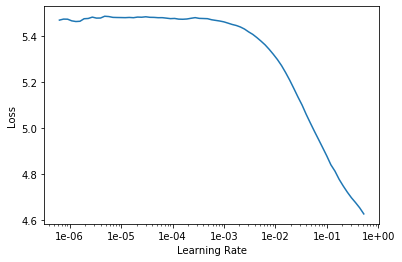

In [170]:
learn.lr_find()
# skip the last 15 learning rates in the plot so we can get a better visualization
learn.recorder.plot(skip_end=15)

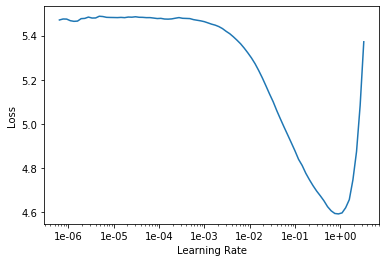

In [171]:
learn.recorder.plot()

In [172]:
learn.fit_one_cycle(1, 1e-01, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.938882,3.313247,0.430283,00:07


In [173]:
%%time
learn.export(base_dir/'fit_head.pkl')

CPU times: user 77.8 ms, sys: 44.1 ms, total: 122 ms
Wall time: 249 ms


In [174]:
learn = load_learner(base_dir, 'fit_head.pkl')

In [0]:
learn.data = data_lm

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-02
Min loss divided by 10: 2.29E-03


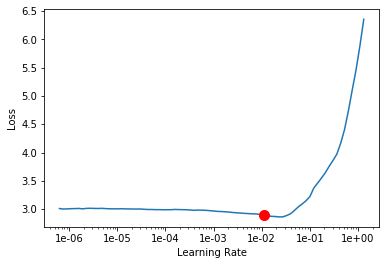

In [177]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

Min numerical gradient: 1.32E-02
Min loss divided by 10: 1.32E-03


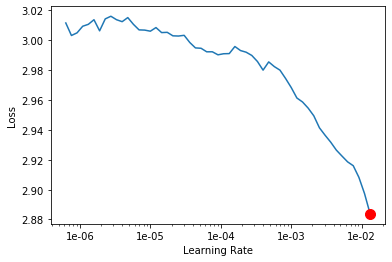

In [178]:
learn.recorder.plot(suggestion=True, skip_end=30)

In [0]:
from fastai.callbacks import *
import os
os.chdir(base_dir)

In [0]:
callbacks = [SaveModelCallback(learn, every='epoch', monitor='valid_loss', mode='auto', name='fine_tuned')]

In [181]:
learn.fit_one_cycle(2, 1e-02, moms=(0.8, 0.7), callbacks=callbacks)

epoch,train_loss,valid_loss,accuracy,time
0,3.093673,3.113858,0.452121,00:08
1,2.629988,3.031989,0.472842,00:08


In [182]:
(base_dir/'models').ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/tmp.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/fine_tuned_0.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/fine_tuned_1.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/lm_fine_tuned_enc.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/clas-first.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/first.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/second.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/third.pth')]

In [0]:
learn.load('fine_tuned_1');

##Language Model Prediction

In [0]:
WORD = 'The fire'
# how many next words do we want to predict
NUM_OF_NEW_WORDS = 20
# Specify the number of sentences that the model can make using the WORD as a starter
NUM_OF_SENTENCES = 2

In [186]:
print('\n'.join(learn.predict(WORD, NUM_OF_NEW_WORDS, temperature=0.60) for _ in range(NUM_OF_SENTENCES)))

The fire truck is on fire on La Reunion . Instead of fire xxbos RT : The
The fire in Pisgah National Forest grows to 375 acres http : / / t.co / Forest


In [187]:
%%time
learn.save_encoder('lm_fine_tuned_enc')

CPU times: user 41.7 ms, sys: 53 ms, total: 94.7 ms
Wall time: 229 ms


In [188]:
(base_dir/'models').ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/tmp.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/fine_tuned_0.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/fine_tuned_1.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/lm_fine_tuned_enc.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/clas-first.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/first.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/second.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/third.pth')]

In [189]:
data_lm.train_ds.vocab

In [190]:
# let's see the number of unique words from disaster tweet that are in our vocab
len(data_lm.vocab.itos)

4264

In [191]:
path.ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/NLP with Disaster Tweets.ipynb'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/data_lm.pkl'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/fit_head.pkl'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/data_cls.pkl')]

In [192]:
data_cls = (TextList.from_csv(path, csv_name='train.csv', cols='text',vocab=data_lm.vocab)
.split_by_rand_pct(valid_pct=0.2, seed=42)
.label_from_df(cols='target')
.add_test(TextList.from_csv(path, csv_name='test.csv', cols='text'))
.databunch(bs=bs))

data_cls.save(base_dir/'data_cls.pkl')

# data_clas = (TextList
#            .from_csv(path, vocab=data_lm.vocab,'clean_train.csv')#, cols='text')
#            #Where are the text? Column 'text' of texts.csv
#            .split_by_rand_pct(0.1)
#            #How to split it? Randomly with the default 20% in valid
#            .label_from_df(cols='target')
#            #Label it for a language model
#            .databunch(bs=bs))
#            #Finally we convert to a DataBunch


# # data_clas.save(base_dir/'data_clas.pkl')

In [0]:
data_cls = load_data(base_dir, 'data_cls.pkl', bs=bs)

In [0]:
learn = text_classifier_learner(data_cls, AWD_LSTM, drop_mult=0.5)

In [0]:
learn.load_encoder('lm_fine_tuned_enc');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-02
Min loss divided by 10: 2.51E-02


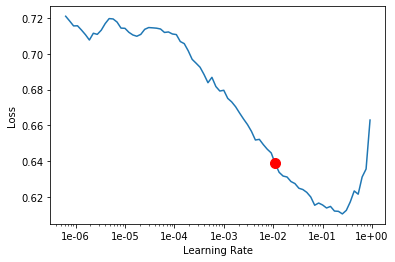

In [196]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [204]:
learn.fit_one_cycle(1, 1e-02, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.496845,0.462992,0.796321,00:07


In [0]:
clas_learn.save('first')

In [0]:
clas_learn.load('first');

In [207]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.498607,0.459020,0.791064,00:07


In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [214]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.327849,0.490298,0.807490,00:08


In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [217]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.291959,0.506219,0.810118,00:08
1,0.285452,0.516589,0.799606,00:07
2,0.279560,0.527288,0.796321,00:07
3,0.264402,0.522579,0.808147,00:08
